In [9]:
import numpy as np

from lib.dataset.hico.hico import Hico, Splits

hico = Hico()
annotations = hico.split_annotations[Splits.TRAIN]

for i, imann in enumerate(annotations):
    pos_actions = hico.interactions[imann > 0, 0]
    neg_actions = hico.interactions[imann < 0, 0]
    both = set(pos_actions.tolist()) & set(neg_actions.tolist())
    if both:
        nzinds = np.flatnonzero(imann)
        print(np.stack([nzinds, imann[nzinds]], axis=0).astype(np.int))
        print(i, [hico.predicates[p] for p in sorted(both)])
        break
        

[[11 12 13 14 15 16 17 18 19 20 21 22 23 86 87 88 89 90 91]
 [ 1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1]]
139 ['hold', 'sit_on']


In [17]:
import torch
x = torch.tensor(torch.from_numpy(np.arange(6).reshape(3, 2)).float(),requires_grad=True)
y = x**2
z = y.sum()
z.backward()
print(x) 
print(y) 
print(x.grad)

print()
x = torch.tensor(torch.from_numpy(np.arange(6).reshape(3, 2)).float(),requires_grad=True)
y = x**2
y[1, 1] = 2342
z = y.sum()
z.backward()
print(x) 
print(y) 
print(x.grad) 

print()
x = torch.tensor(torch.from_numpy(np.arange(6).reshape(3, 2)).float(),requires_grad=True)
y = x**2
y[1, 1] -= 9
z = y.sum()
z.backward()
print(x) 
print(y) 
print(x.grad) 

tensor([[0., 1.],
        [2., 3.],
        [4., 5.]], requires_grad=True)
tensor([[ 0.,  1.],
        [ 4.,  9.],
        [16., 25.]], grad_fn=<PowBackward0>)
tensor([[ 0.,  2.],
        [ 4.,  6.],
        [ 8., 10.]])

tensor([[0., 1.],
        [2., 3.],
        [4., 5.]], requires_grad=True)
tensor([[   0.,    1.],
        [   4., 2342.],
        [  16.,   25.]], grad_fn=<CopySlices>)
tensor([[ 0.,  2.],
        [ 4.,  0.],
        [ 8., 10.]])

tensor([[0., 1.],
        [2., 3.],
        [4., 5.]], requires_grad=True)
tensor([[ 0.,  1.],
        [ 4.,  0.],
        [16., 25.]], grad_fn=<CopySlices>)
tensor([[ 0.,  2.],
        [ 4.,  6.],
        [ 8., 10.]])


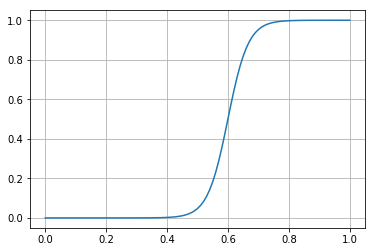

In [32]:
import numpy as np
from matplotlib import pyplot as plt

n = 100
x = np.arange(n + 1) / n

w, k = 30, 18
T = 1 + np.exp(k - w).item()
y = T / (1 + np.exp(-(w * x - k)))

plt.plot(x, y)
plt.grid()
plt.show()


In [1]:
with open('imagenet1000classes.txt', 'r') as f:
    inet_categories = [' '.join(l.strip('{}, \n').split()[1:]).strip("'").split(', ') 
               for l in f.readlines()]
print(inet_categories[0])
print(inet_categories[1])
print(inet_categories[-2])
print(inet_categories[-1])

from lib.detection.wrappers import COCO_CLASSES
print(COCO_CLASSES)

common = set(COCO_CLASSES.values()) & {c for cat in inet_categories for c in cat}
print(len(common))   


['tench', 'Tinca tinca']
['goldfish', 'Carassius auratus']
['ear', 'spike', 'capitulum']
['toilet tissue', 'toilet paper', 'bathroom tissue']
{0: '__background__', 1: 'person', 2: 'bicycle', 3: 'car', 4: 'motorcycle', 5: 'airplane', 6: 'bus', 7: 'train', 8: 'truck', 9: 'boat', 10: 'traffic light', 11: 'fire hydrant', 12: 'stop sign', 13: 'parking meter', 14: 'bench', 15: 'bird', 16: 'cat', 17: 'dog', 18: 'horse', 19: 'sheep', 20: 'cow', 21: 'elephant', 22: 'bear', 23: 'zebra', 24: 'giraffe', 25: 'backpack', 26: 'umbrella', 27: 'handbag', 28: 'tie', 29: 'suitcase', 30: 'frisbee', 31: 'skis', 32: 'snowboard', 33: 'sports ball', 34: 'kite', 35: 'baseball bat', 36: 'baseball glove', 37: 'skateboard', 38: 'surfboard', 39: 'tennis racket', 40: 'bottle', 41: 'wine glass', 42: 'cup', 43: 'fork', 44: 'knife', 45: 'spoon', 46: 'bowl', 47: 'banana', 48: 'apple', 49: 'sandwich', 50: 'orange', 51: 'broccoli', 52: 'carrot', 53: 'hot dog', 54: 'pizza', 55: 'donut', 56: 'cake', 57: 'chair', 58: 'couch

In [ ]:
import pickle
import numpy as np
to_filter = [19, 25, 117, 144, 151, 152, 154, 163, 167, 
             190, 245, 258, 307, 326, 347, 366, 400, 
             433, 434, 466, 471, 476, 479, 523, 598]
keep = set(range(600)) - set(to_filter)
d = {'train': {'inter': np.array(sorted(keep))
               }
     }
with open('zero-shot_inds/seen_inds_2.pkl.push', 'wb') as f:
    pickle.dump(d, f)
    
    

In [7]:
import pickle
import numpy as np
from lib.dataset.hico.hico import Hico

hico = Hico()
num_seen_obj = 40 
num_seen_act = 59 

with open('imagenet1000classes.txt', 'r') as f:
    inet_categories = [' '.join(l.strip('{}, \n').split()[1:]).strip("'").split(', ') 
                       for l in f.readlines()]
    inet_classes = {c for cat in inet_categories for c in cat}

hico_objects = [obj.replace('_', ' ') for obj in hico.objects]
common_str = set(hico_objects) & inet_classes
common = {i for i, n in enumerate(hico_objects) if n in common_str}
print(len(common))
hico_only = set(range(hico.num_object_classes)) - common - {hico.human_class}

all_num_inters = []
all_data = []
for i in range(10**5):
    np.random.seed(i)
    seen_obj = np.random.choice(np.array(list(hico_only)), 
                                size=num_seen_obj - len(common) - 1, replace=False)
    seen_obj = np.sort(np.concatenate([seen_obj, np.array([hico.human_class]), np.array(list(common))]))
    assert hico.human_class in seen_obj
    
    seen_act = np.random.choice(np.arange(1, hico.num_predicates), size=num_seen_act - 1, replace=False)
    seen_act = np.sort(np.concatenate([np.array([0]), seen_act]))
    
    num_inters = (hico.op_pair_to_interaction[seen_obj, :][:, seen_act] >= 0).sum()
    all_num_inters.append(num_inters)
    all_data.append([seen_obj, seen_act])

m = np.argmax(np.array(all_num_inters))
num_inters = all_num_inters[m]
seen_obj, seen_act = all_data[m]
u_seen_obj = np.unique(seen_obj)
u_seen_act = np.unique(seen_act)
assert seen_obj.size == num_seen_obj and seen_act.size == num_seen_act
assert u_seen_obj.size == num_seen_obj and u_seen_act.size == num_seen_act
d = {'train': {'obj': seen_obj, 'pred':seen_act}}
with open('zero-shot_inds/seen_inds_3.pkl.push', 'wb') as f:
    pickle.dump(d, f)


22


In [33]:
import pickle
import numpy as np
from lib.dataset.hico.hico import Hico

hico = Hico()
num_seen_obj = 40 
num_seen_act = 59 

with open('imagenet1000classes.txt', 'r') as f:
    inet_categories = [' '.join(l.strip('{}, \n').split()[1:]).strip("'").split(', ') 
                       for l in f.readlines()]
    inet_classes = {c for cat in inet_categories for c in cat}

hico_objects = [obj.replace('_', ' ') for obj in hico.objects]
common_str = set(hico_objects) & inet_classes
common = {i for i, n in enumerate(hico_objects) if n in common_str}
print(len(common))
hico_only = set(range(hico.num_object_classes)) - common - {hico.human_class}

np.random.seed(42)
seen_obj = np.random.choice(np.array(list(hico_only)), 
                            size=num_seen_obj - len(common) - 1, replace=False)
seen_obj = np.sort(np.concatenate([seen_obj, np.array([hico.human_class]), np.array(list(common))]))
assert hico.human_class in seen_obj

seen_act = np.random.choice(np.arange(1, hico.num_predicates), size=num_seen_act - 1, replace=False)
seen_act = np.sort(np.concatenate([np.array([0]), seen_act]))

u_seen_obj = np.unique(seen_obj)
u_seen_act = np.unique(seen_act)
assert seen_obj.size == num_seen_obj and seen_act.size == num_seen_act
assert u_seen_obj.size == num_seen_obj and u_seen_act.size == num_seen_act
d = {'train': {'obj': seen_obj, 'pred':seen_act}}
with open('zero-shot_inds/seen_inds_4.pkl.push', 'wb') as f:
    pickle.dump(d, f)


22


In [35]:
import pickle
import numpy as np
from lib.dataset.hico.hico import Hico

hico = Hico()
num_seen_obj = 40 
num_seen_act = 59 

with open('imagenet1000classes.txt', 'r') as f:
    inet_categories = [' '.join(l.strip('{}, \n').split()[1:]).strip("'").split(', ') 
                       for l in f.readlines()]
    inet_classes = {c for cat in inet_categories for c in cat}

hico_objects = [obj.replace('_', ' ') for obj in hico.objects]
common_str = set(hico_objects) & inet_classes
common = {i for i, n in enumerate(hico_objects) if n in common_str}
print(len(common))
hico_only = set(range(hico.num_object_classes)) - common - {hico.human_class}

all_num_inters = []
all_data = []
for i in range(10**5):
    np.random.seed(i)
    seen_obj = np.random.choice(np.array(list(hico_only)), 
                                size=num_seen_obj - len(common) - 1, replace=False)
    seen_obj = np.sort(np.concatenate([seen_obj, np.array([hico.human_class]), np.array(list(common))]))
    assert hico.human_class in seen_obj
    
    seen_act = np.random.choice(np.arange(1, hico.num_predicates), size=num_seen_act - 1, replace=False)
    seen_act = np.sort(np.concatenate([np.array([0]), seen_act]))
    
    num_inters = (hico.op_pair_to_interaction[seen_obj, :][:, seen_act] >= 0).sum()
    all_num_inters.append(num_inters)
    all_data.append([seen_obj, seen_act])

m = np.argmin(np.array(all_num_inters))
num_inters = all_num_inters[m]
seen_obj, seen_act = all_data[m]
u_seen_obj = np.unique(seen_obj)
u_seen_act = np.unique(seen_act)
assert seen_obj.size == num_seen_obj and seen_act.size == num_seen_act
assert u_seen_obj.size == num_seen_obj and u_seen_act.size == num_seen_act
d = {'train': {'obj': seen_obj, 'pred':seen_act}}
with open('zero-shot_inds/seen_inds_5.pkl.push', 'wb') as f:
    pickle.dump(d, f)

22


In [1]:
import pickle
from lib.dataset.hico.hico import Hico
fnum = 5
d = pickle.load(open(f'zero-shot_inds/seen_inds_{fnum}.pkl.push', 'rb'))
pinds = d['train']['pred']
oinds = d['train']['obj']

hd = Hico()
print((hd.op_pair_to_interaction[oinds, :][:, pinds] >= 0).sum())


87


In [16]:
import pickle
from lib.dataset.hicodet.hicodet import HicoDet
from lib.dataset.utils import Splits
d = pickle.load(open('zero-shot_inds/seen_inds_2.pkl.push', 'rb'))
iinds = d['train']['inter']

hd = HicoDet()
oi = np.concatenate([np.stack([x.box_classes[x.hois[:, 2]], x.hois[:, 1]], axis=1) 
                       for x in hd.split_data[Splits.TRAIN]], axis=0)
inters = hd.op_pair_to_interaction[oi[:, 0], oi[:, 1]]
imask = np.zeros(600, dtype=int)
imask[iinds] = 1
print(imask[inters].sum())



107668


In [4]:
import json
d = json.load(open('data/VideoCaptions/train.json', 'r'))
captions = [s for v in d.values() for s in v['sentences']]
print(captions[0])
 

A young woman is seen standing in a room and leads into her dancing.
